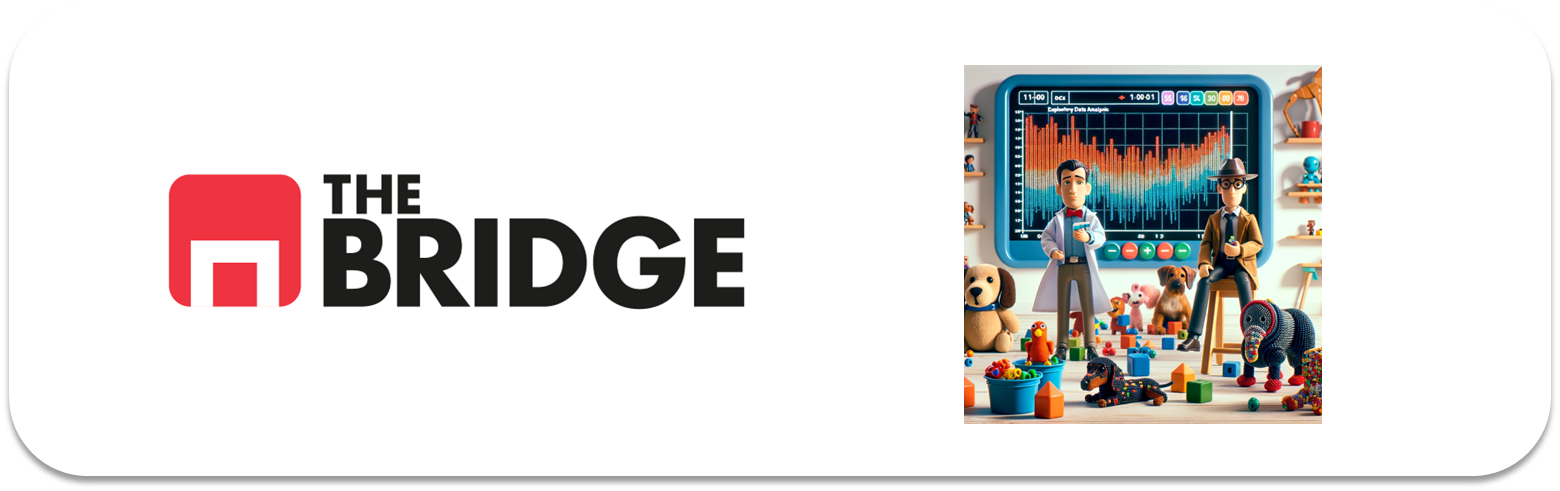

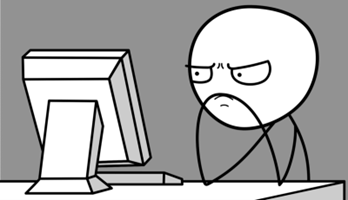

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [4]:
df_admission = pd.read_csv("./data/admission_data.csv")
df_admission.drop(columns="Unnamed: 0", inplace=True)
df_admission.head()

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

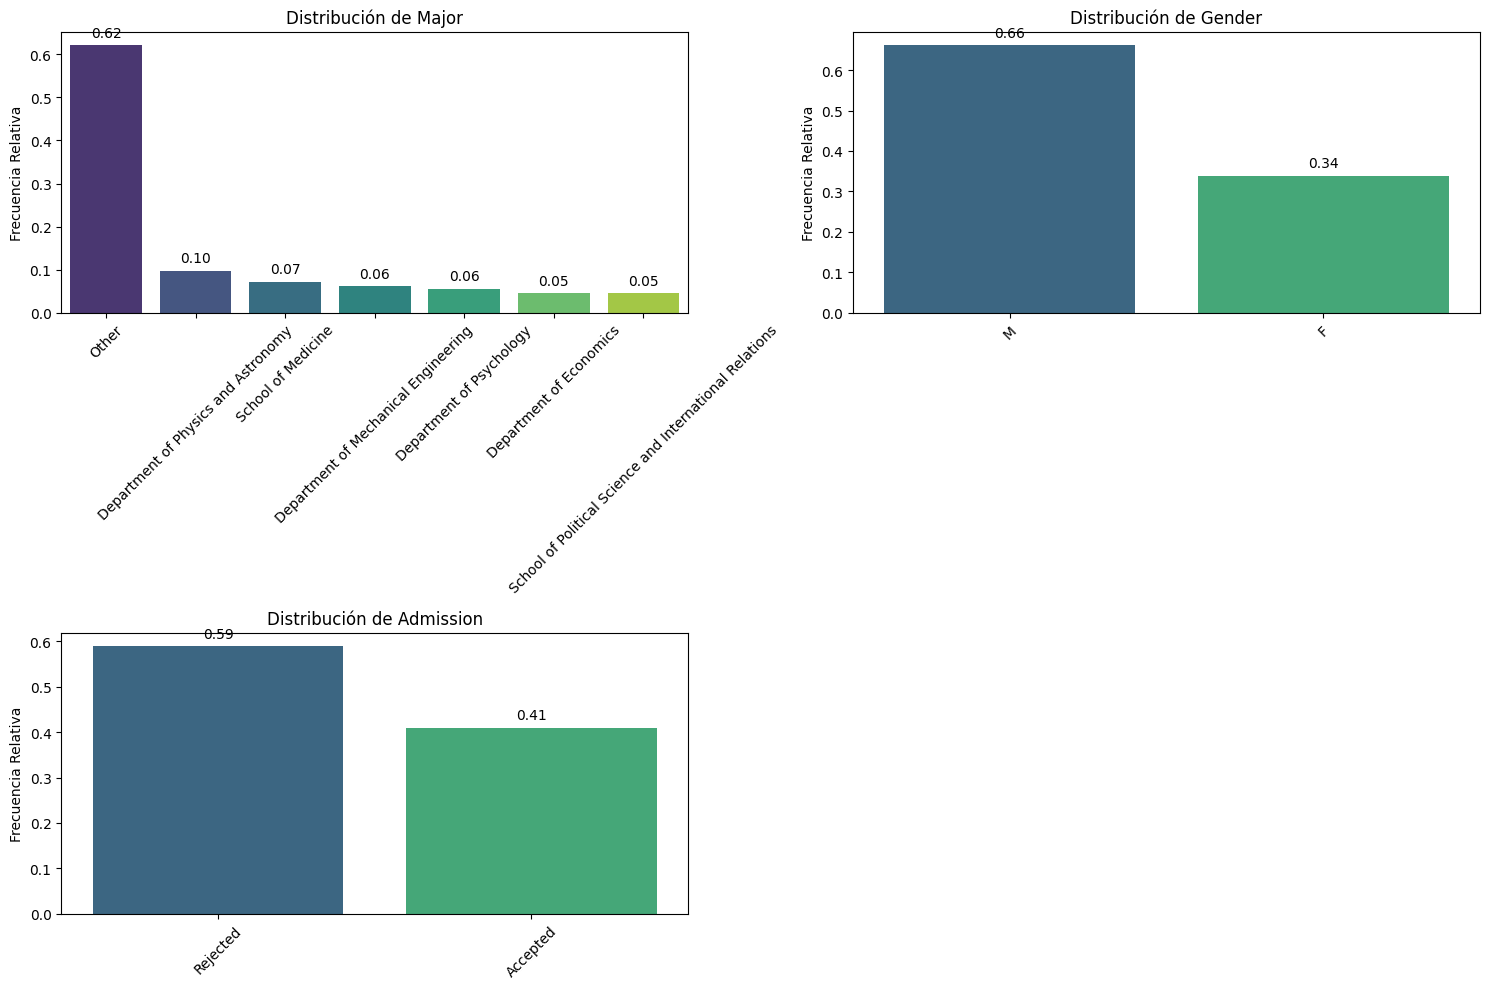

In [5]:
#0 pinto todos los valores iniciales
pinta_distribucion_categoricas(df_admission,["Major","Gender","Admission"], relativa= True, mostrar_valores= True)

In [ ]:
#1 Escojo la variable directora
# En mi caso va a ser la de admisiones

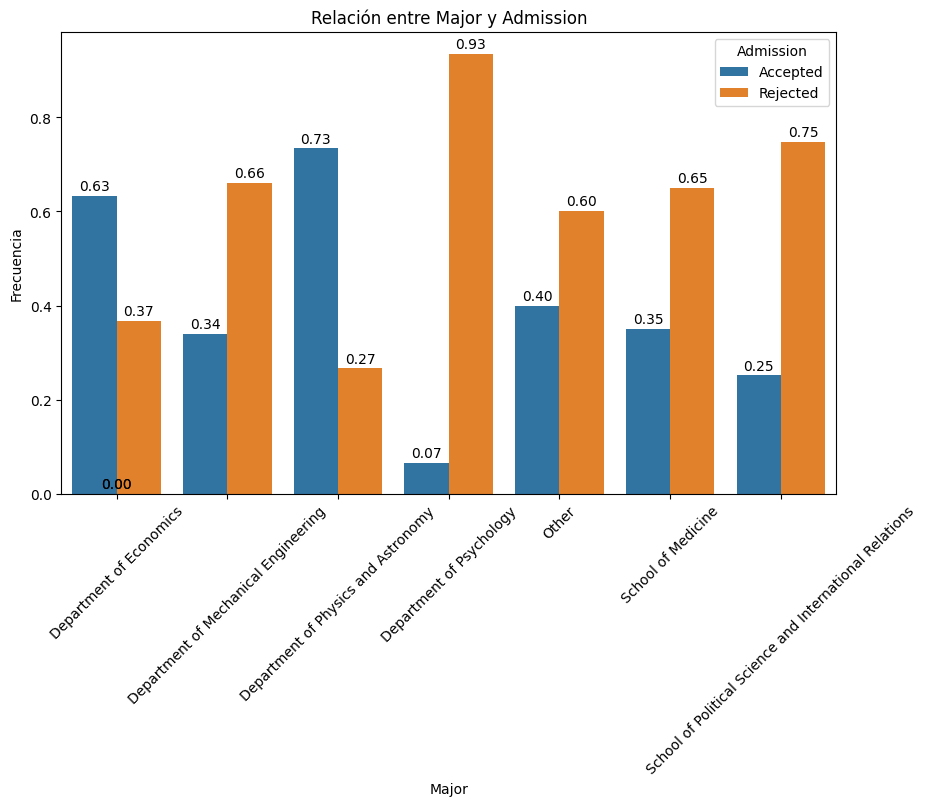

In [ ]:
# Muestro el bivariante de las otras dos

# Major - Admission
plot_categorical_relationship_fin(df_admission,"Major","Admission", relative_freq= True, show_values= True, size_group=7)

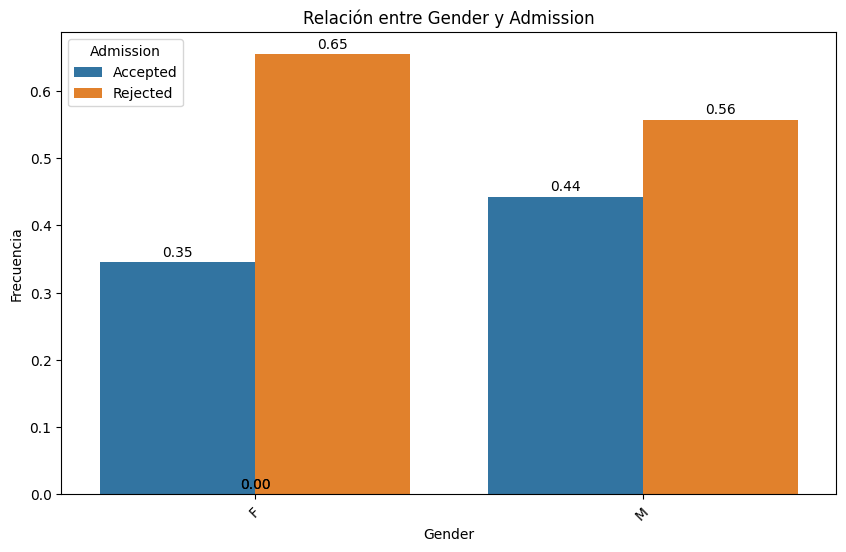

In [ ]:
# Gender - Admission
plot_categorical_relationship_fin(df_admission,"Gender","Admission", relative_freq= True, show_values= True, size_group=7)

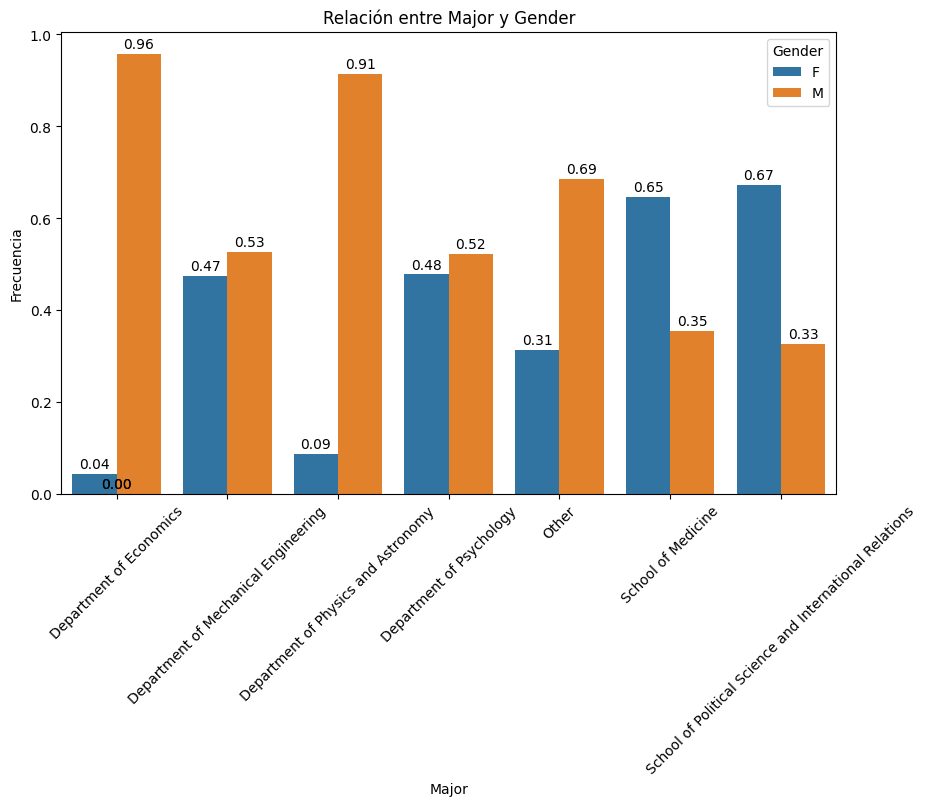

In [ ]:
# Major - Gender (esta no la habia hecho antes)
plot_categorical_relationship_fin(df_admission,"Major","Gender", relative_freq= True, show_values= True, size_group=7)

In [24]:
#3 Divido mi dataset en tantos subdatasets (dataframes) como valores de mi categórica directora
# y me quedo solo con las columnas de las otras dos variables


columnas = ["Admission","Gender","Major"] 
col_directora = "Admission"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admission[col_directora].unique():
    diccionario_multivariante[valor] = df_admission.loc[df_admission[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta Rejected:


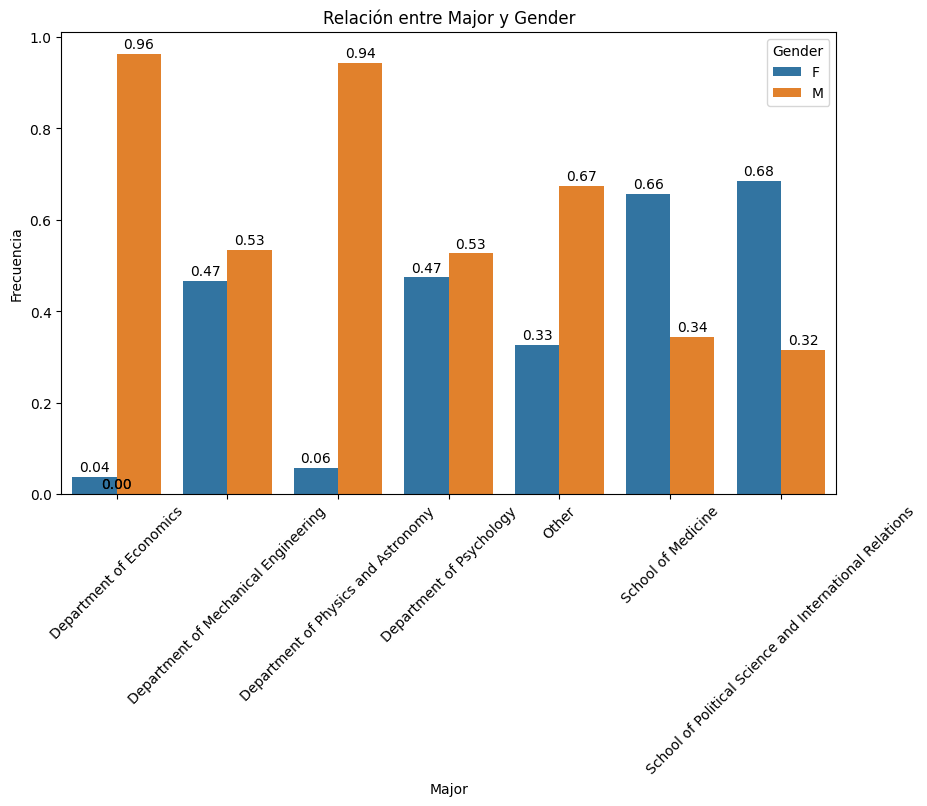

Respuesta Accepted:


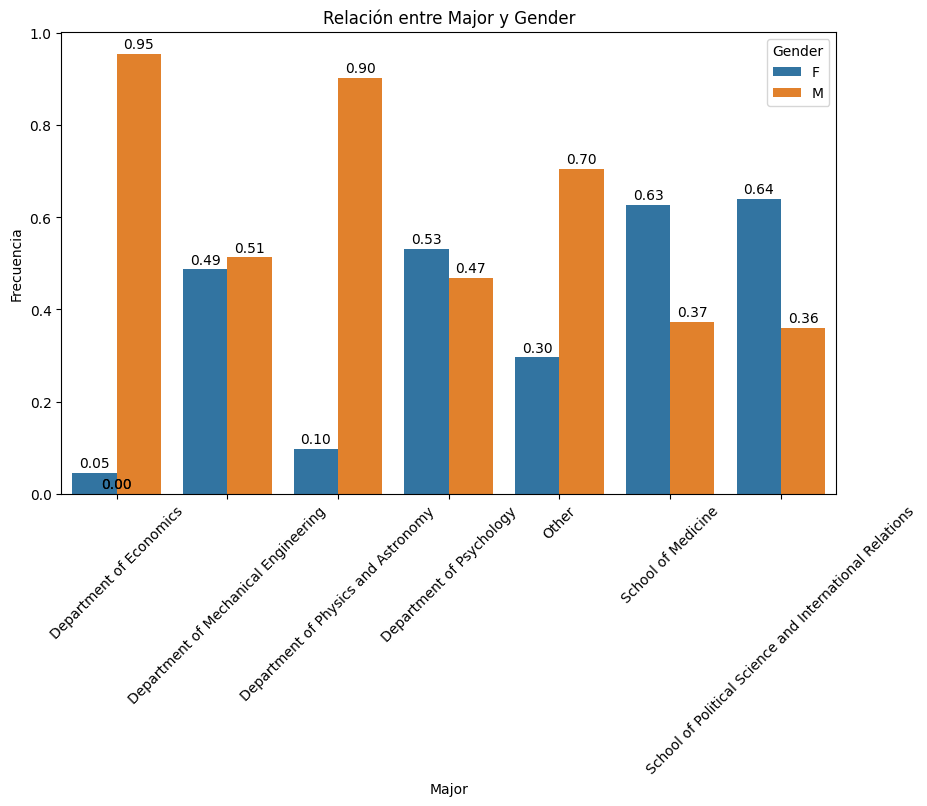

In [25]:
#4 Hago un análsis bivariante para cada subdataset y comparo todo

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group=7)

- ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?
    - A priori en todo aquel donde se vea un desequilibrio grande entre hombres y mujeres en admitidos (pero habría que ver si es por el num de ese genero en ese dpto)

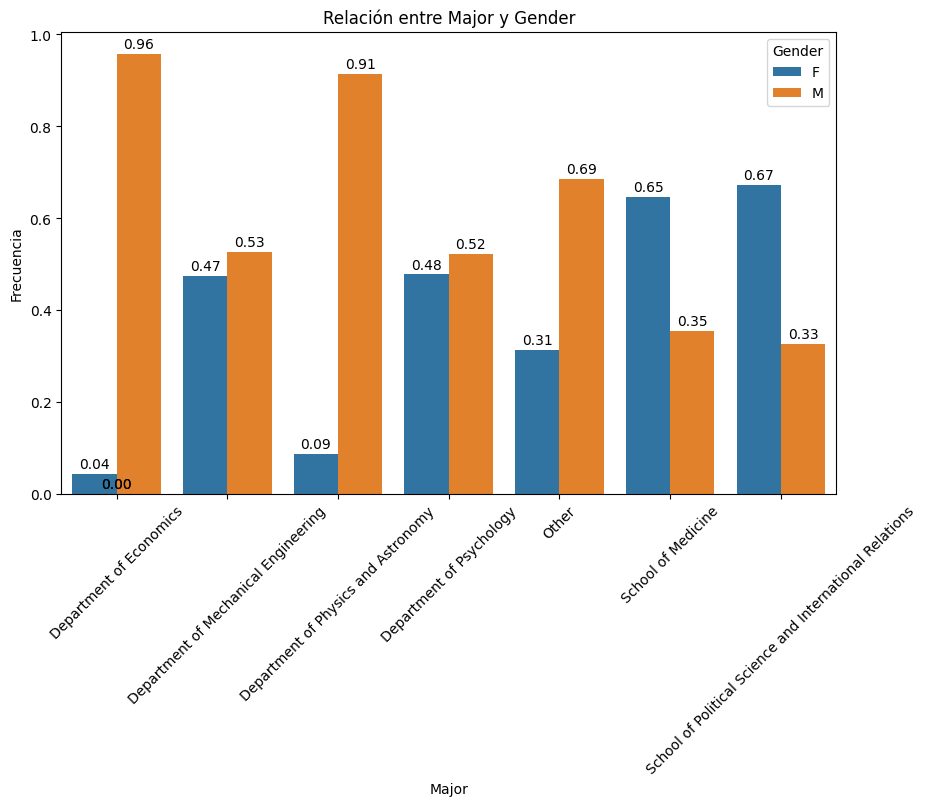

In [ ]:
#me traigo de nuevo la relacion bivariante para comparar 
plot_categorical_relationship_fin(df_admission,"Major","Gender", relative_freq= True, show_values= True, size_group=7)

- ¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género?
    - Comparando resultados, donde hay mas hombres, hay mas admitidos hombres y viceversa, por lo que tendría consonancia.

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [26]:
df_tip = pd.read_csv("./data/tips.csv")
df_tip.drop(columns="Unnamed: 0", inplace=True)
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [27]:
df_crashes = pd.read_csv("./data/car_crashes.csv",sep="|")
df_crashes.head()

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [28]:
df_crashes.drop(columns="Unnamed: 0", inplace=True)
df_crashes.rename(columns={"abbrev" : "state"}, inplace=True)
df_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [29]:
df_crashes.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'state'],
      dtype='object')

In [ ]:
# correlaciones de forma numerica

corr_matrix = df_crashes.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


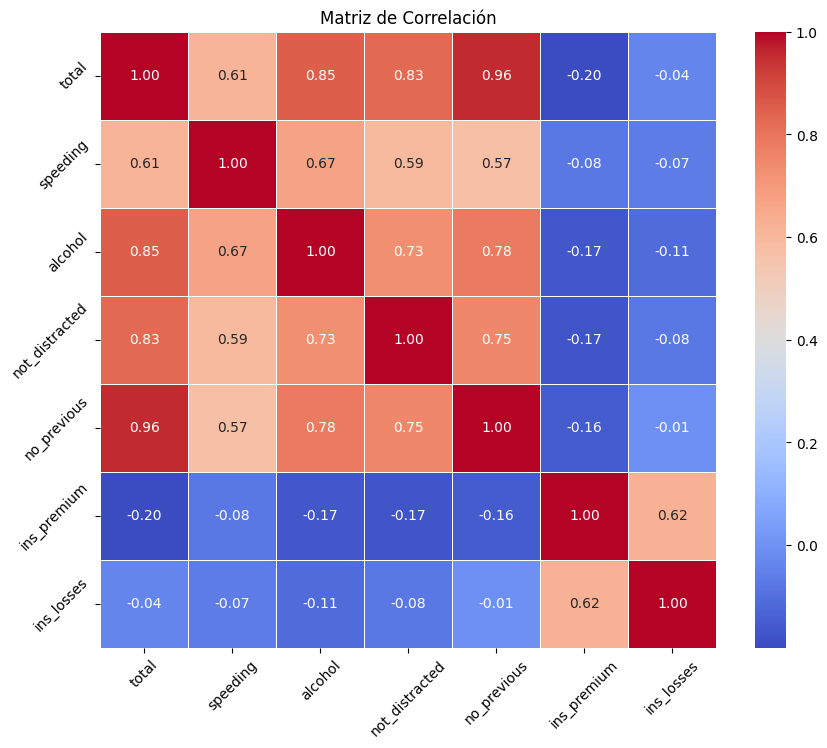

In [ ]:
# heatmap

plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

In [ ]:
# seleccionamos solo las numericas
df_solo_numeros = df_crashes.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

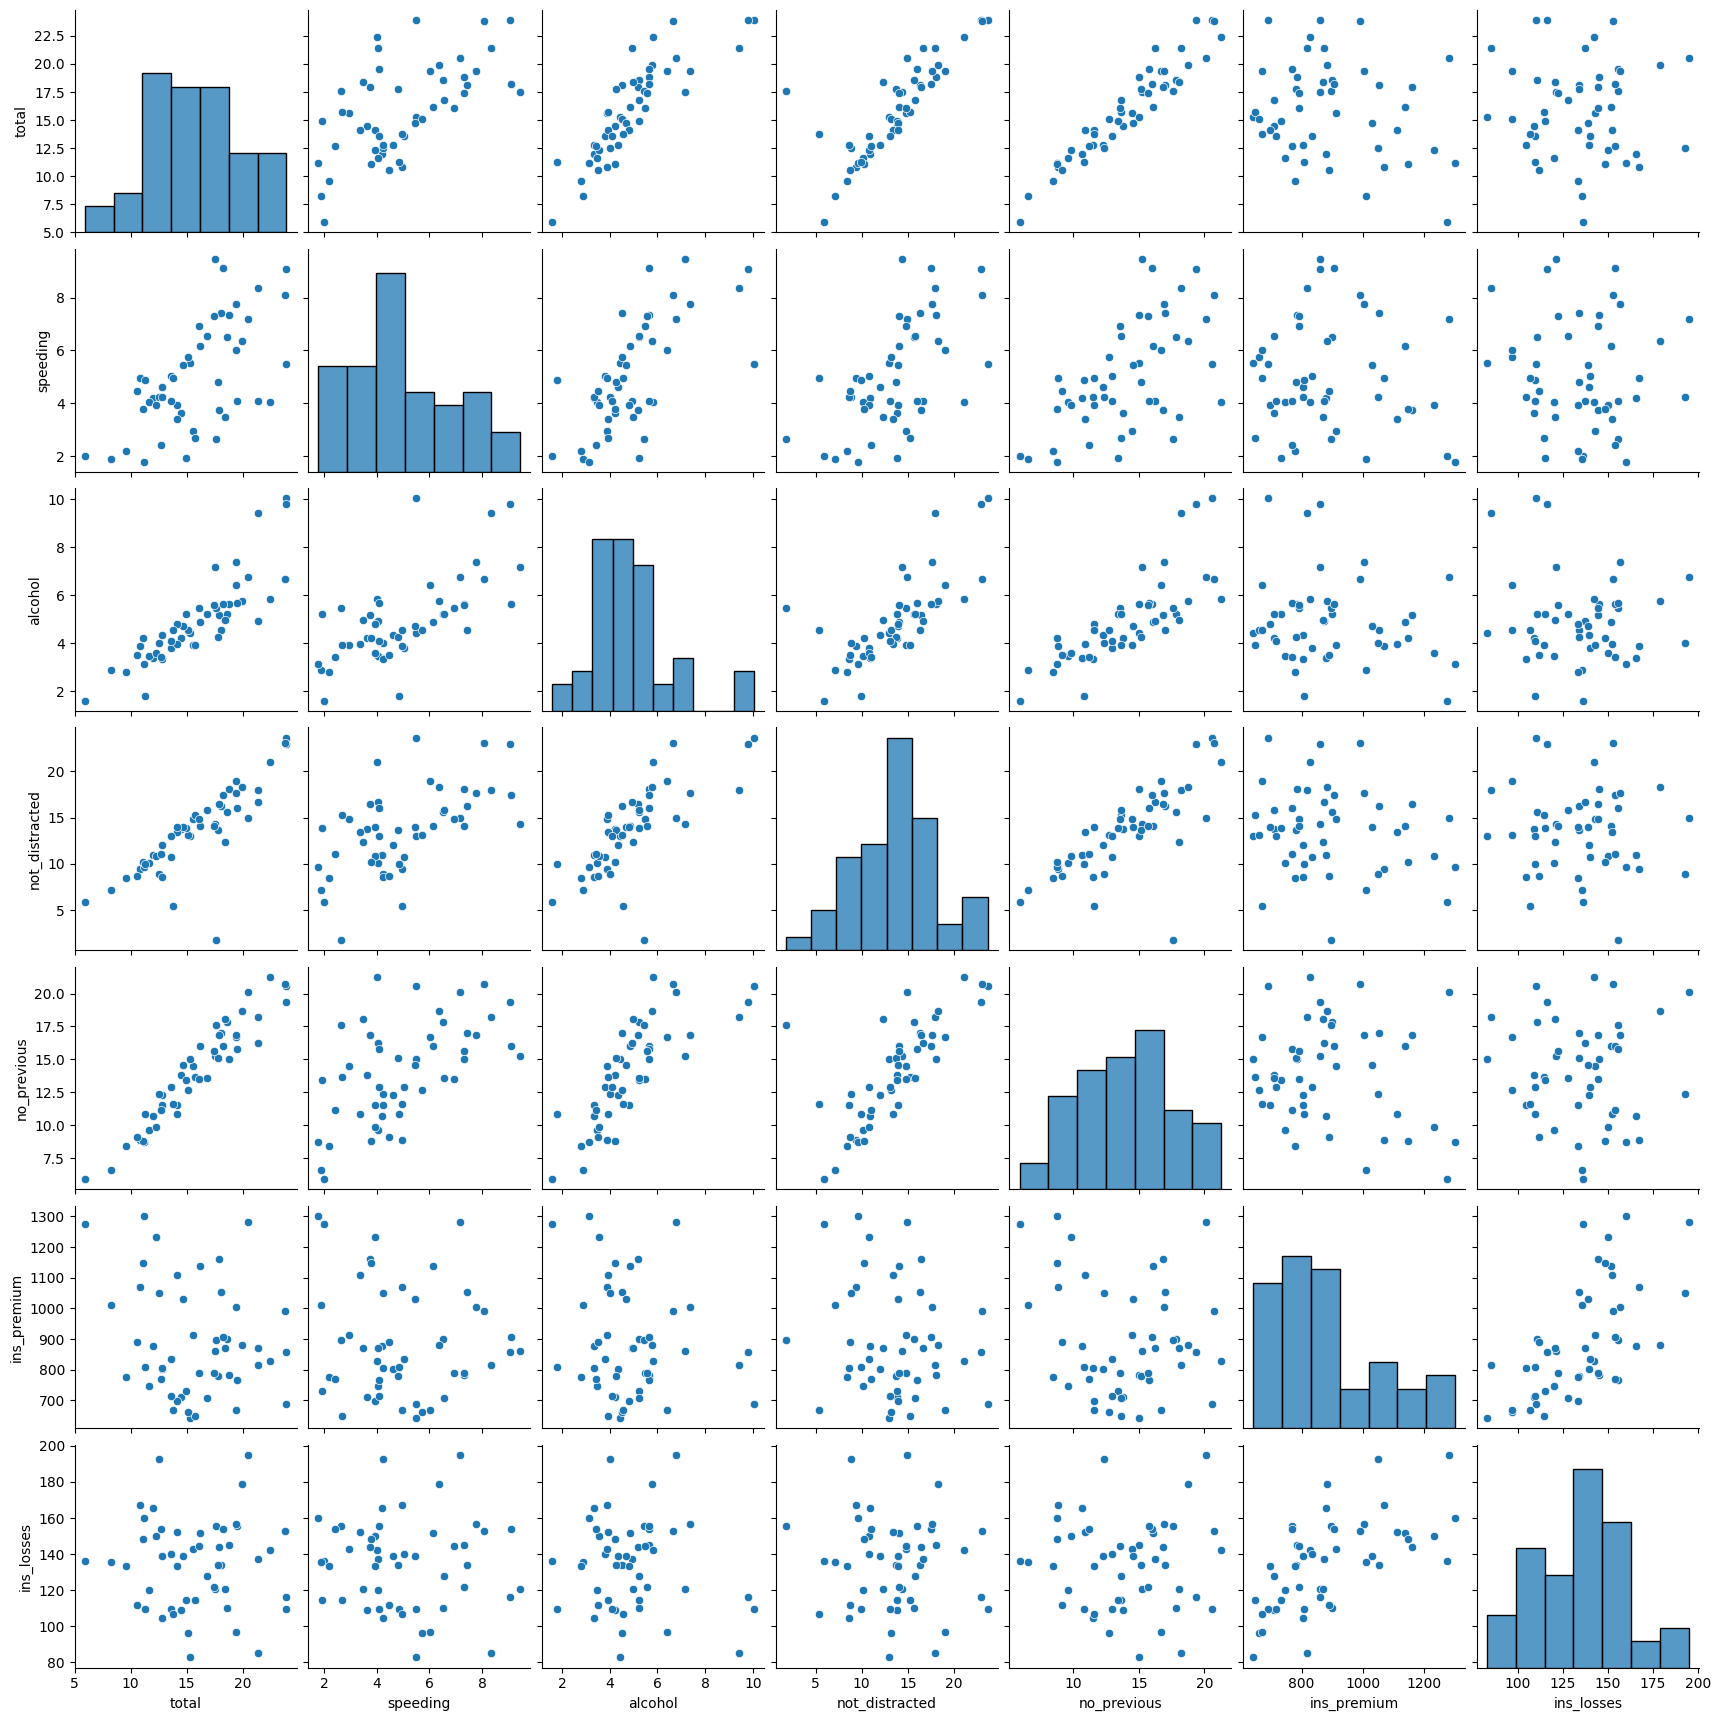

In [33]:
#pairplot

sns.pairplot(df_solo_numeros)
plt.show()

- ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?
    - 'No_previus' > alcohol > not_distracted > speeding

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

(3, 2)


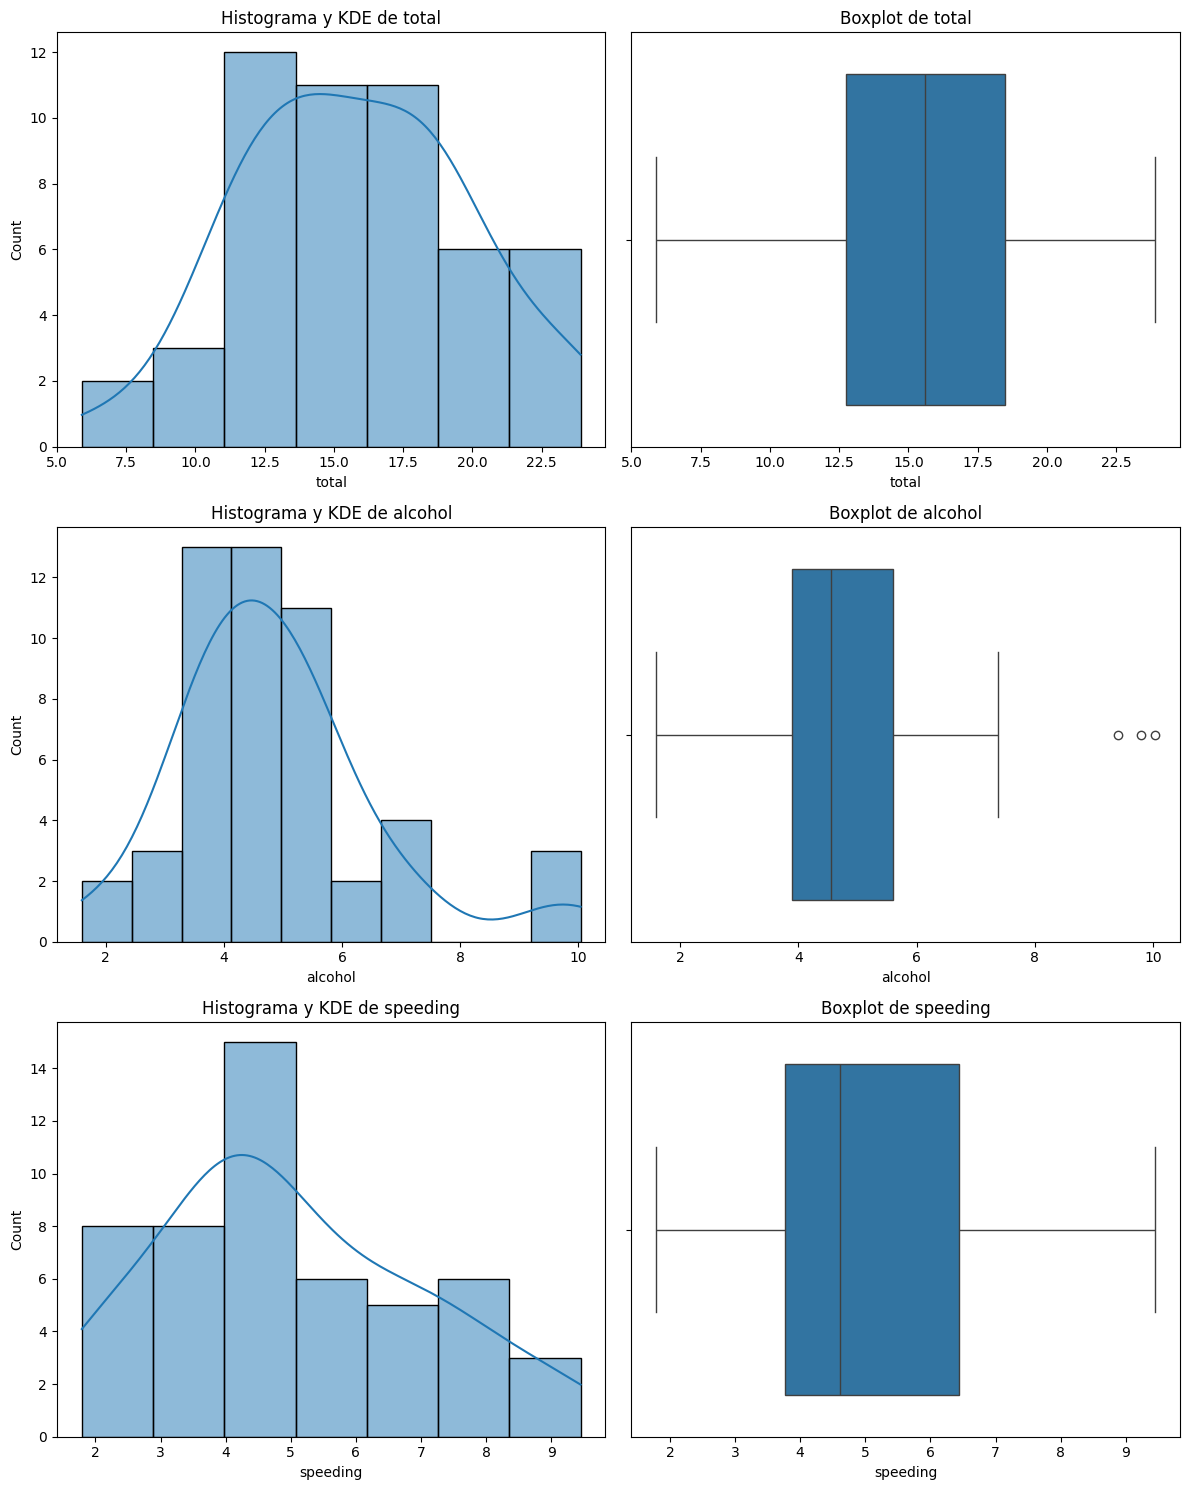

In [ ]:
# anarilis univariable
plot_combined_graphs(df_crashes,["total","alcohol","speeding"])

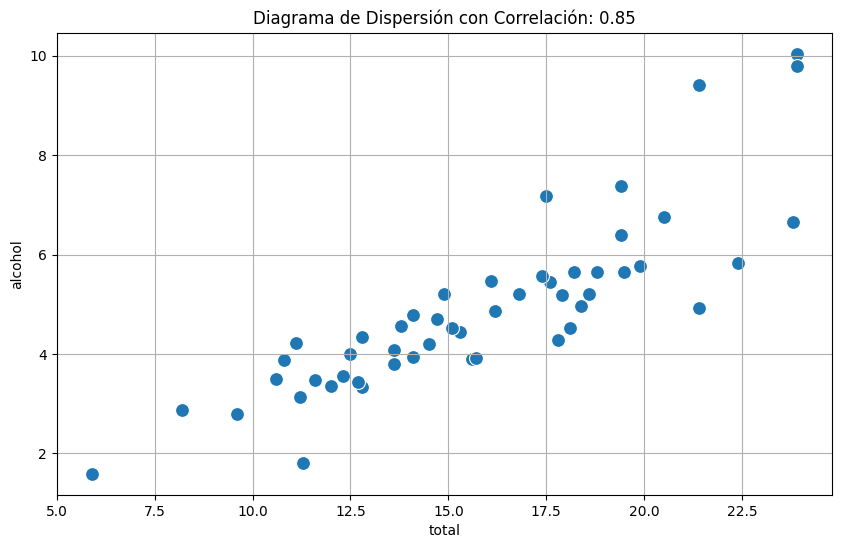

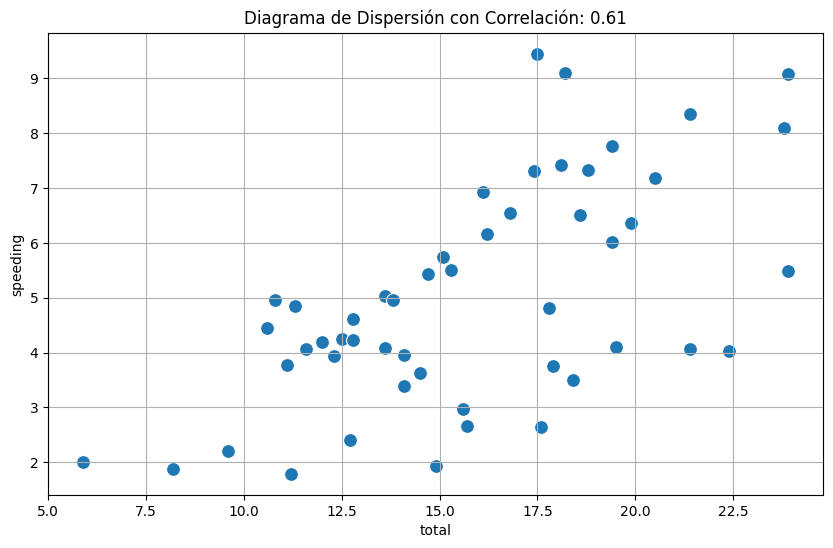

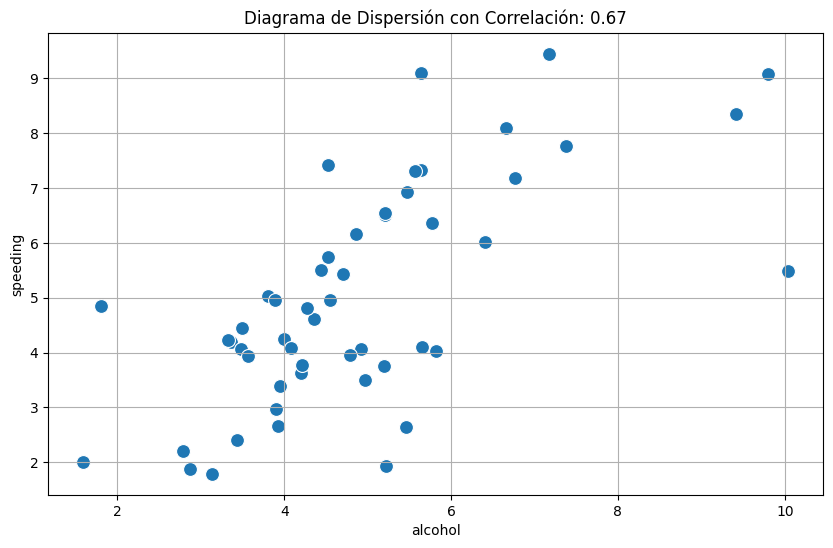

In [ ]:
# análisis bivariante
grafico_dispersion_con_correlacion(df_crashes,"total", "alcohol", mostrar_correlacion= True, tamano_puntos= 100)
grafico_dispersion_con_correlacion(df_crashes,"total", "speeding", mostrar_correlacion= True, tamano_puntos= 100)
grafico_dispersion_con_correlacion(df_crashes,"alcohol", "speeding", mostrar_correlacion= True, tamano_puntos= 100)

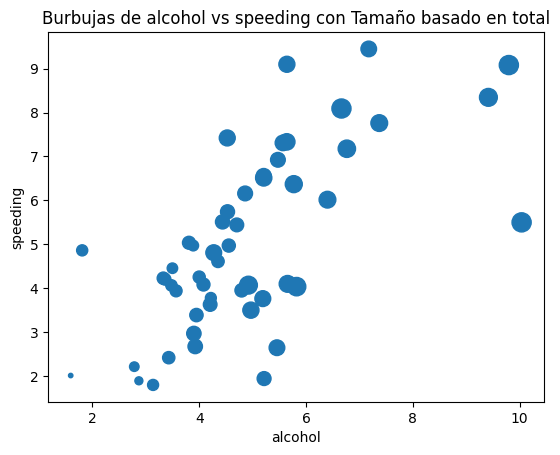

In [53]:
# mostramos los tres valores a la vez
bubble_plot(df_crashes,"alcohol","speeding","total", scale = 0.10)

In [44]:
corr_matrix_trivariante= df_crashes[["total","alcohol","speeding"]].corr()
corr_matrix_trivariante

,total,alcohol,speeding
total,1.000000,0.852613,0.611548
alcohol,0.852613,1.000000,0.669719
speeding,0.611548,0.669719,1.000000


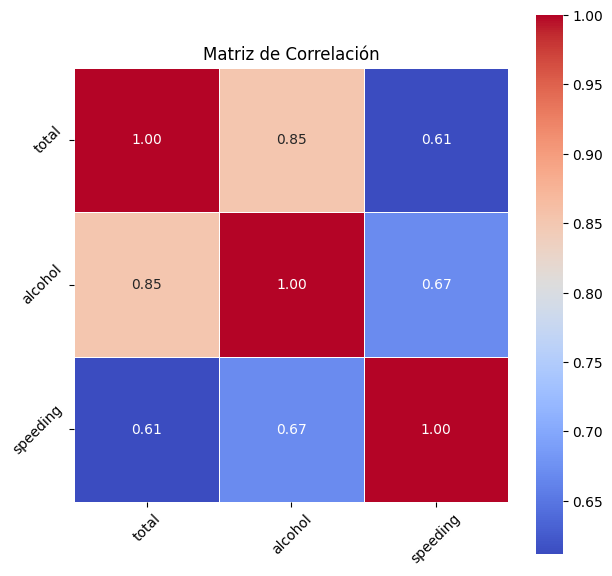

In [49]:
plt.figure(figsize=(7, 7))  
# Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix_trivariante, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) 
# el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

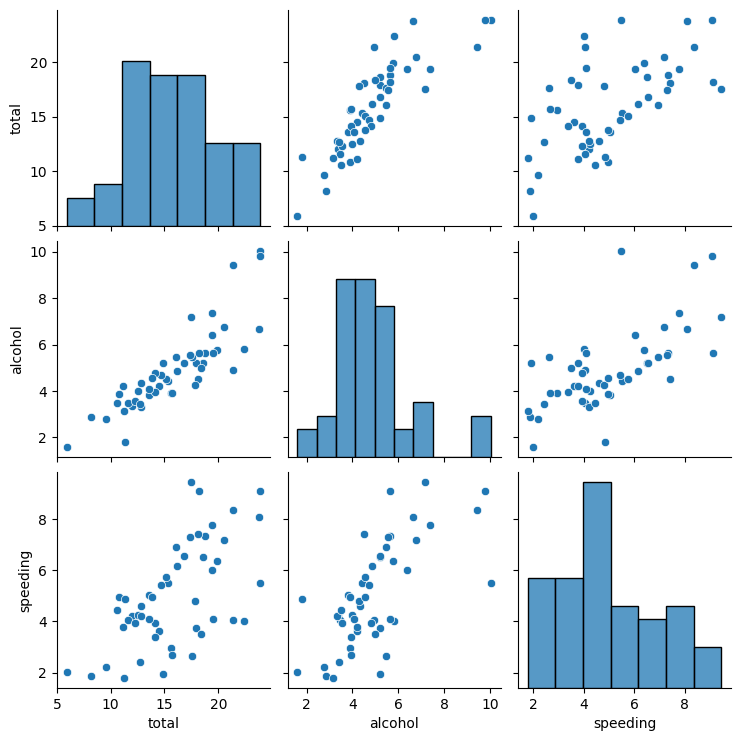

In [52]:
sns.pairplot(df_crashes[["total","alcohol","speeding"]])
plt.show()

- El numero total de accidente está muy relacionado con el alcohol
- Pero también, el total de accidente está relacionado con la velocidad, en menor medida.
- Y la velocidad con el alcohol ocurre lo mismo

Por lo que podríamos decir que las tres variables tienen correlacion entre si